# Итоговый проект

## Вариант 3

1. Задать уравнения кривой второго порядка и поверхности второго порядка в символьном виде.
2. Построить графики заданной кривой и поверхности. Обратить внимание на расположение координаты 0, 0.
3. Привести аналитически (например, методом ортогонального преобразования) квадратичные формы, описывающие кривую и поверхность второго порядка к каноническому виду.
4. Построить графики приведенных к каноническому виду кривой и поверхности второго порядка. 
5. Сделать выводы, оформить блокнот.

## Уравнения
Кривая: $x^2 + y^2 + 12xy + 6x + 24y = 0$ 
   
Поверхность: $x^2 + 10y^2 + 10z^2 + 12xy + 12xz + 24yz = 0$

## Выполнение работы
Объявим необходимые переменные и зададим уравнения кривой и поверхности в символьном виде:

In [2]:
x, y, z = var('x y z')
curve   = x^2 + y^2 + 12*x*y + 6*x + 24*y == 0 # уравнение кривой
surface = x^2 + 10*y^2 + 10*z^2 + 12*x*y + 12*x*z + 24*y*z == 0 # уравнение поверхности

**Построим график поверхности $x^2 + 10y^2 + 10z^2 + 12xy + 12xz + 24yz = 0$:**

In [3]:
implicit_plot3d(
    surface,
    (x, -10, 10), (y, -10, 10), (z, -10, 10),
    viewer='threejs',
    adaptive='true'
)

Graphics3d Object

**Построим график кривой $ x^2 + y^2 + 12xy + 6x + 24y = 0 $ и нанесем на график черным цветом точку (0; 0):**

No handles with labels found to put in legend.


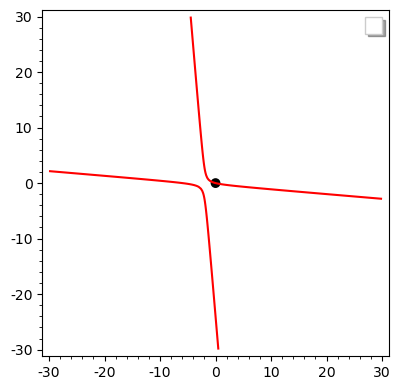

In [3]:
g = Graphics() 
g += point((0, 0), size=50, color='black') # точка (0; 0)
g += implicit_plot( # график кривой
    curve, (x, -30, 30), (y, -30, 30), 
    color='red', 
    legend_label="$x^2 + y^2 + 12xy + 6x + 24y = 0$"
) # Легенда не отображается в связи с ошибкой в Sage
g.legend(True)
g.show()

**Найдем горизонтальные и наклонные ассимптоты для данного графика:**

Подставим функцию $ y = kx + b $ в функцию кривой $ x^2 + y^2 + 12xy + 6x + 24y = 0 $

In [4]:
k, b = var('k b')
hassymptote_equation = curve.subs(y == k*x + b).full_simplify().left() # подстановка y = kx+b в функцию кривой
pretty_print(hassymptote_equation)

(k^2 + 12*k + 1)*x^2 + b^2 + 2*((b + 12)*k + 6*b + 3)*x + 24*b

Приравняем коэффициенты перед $ x^2 $ и $ x $ к нулю и решим систему уравнений

In [5]:
hassymptote_coeffs_equations = [] # список уравнений для нахождения коэффициентов ассимптоты 
hassymptote_coeffs_equations.append(
    hassymptote_equation.coefficient(x, 2) == 0 # приравниваем к нулю коэффициент перед x^2
)
hassymptote_coeffs_equations.append(
    hassymptote_equation.coefficient(x, 1) == 0 # приравниваем к нулю коэффициент перед x
)
hcoefficients = solve(hassymptote_coeffs_equations, [k, b]) # решаем систему уравнений
pretty_print(hcoefficients) # коэффициенты прямых - наклонных ассимптот к графику

[[k == -sqrt(35) - 6, b == -69/35*sqrt(35) - 12], [k == sqrt(35) - 6, b == 69/35*sqrt(35) - 12]]

**Найдем вертикальные ассимптоты для графика кривой:**

Подставим x = a в функцию кривой $ x^2 + y^2 + 12xy + 6x + 24y = 0 $

In [6]:
a = var('a')
vassymptote_equation = curve.subs(x == a).simplify().left() # подстановка x = a в функцию кривой
pretty_print(vassymptote_equation)

a^2 + 12*a*y + y^2 + 6*a + 24*y

Для существования вертикальной ассимптоты коэффициент перед $ y^2 $ должен равняться 0.

Если данное условие выполнено, то коэффициент $ a $ можно получить, если приравнять коэффициент перед y к 0

In [7]:
has_vassymptote = bool(vassymptote_equation.coefficient(y, 2) == 0) # проверка существования вертикальной ассимптоты
vassymptote_coeff = vassymptote_equation.coefficient(y, 1)
if has_vassymptote:
    pretty_print(x == vassymptote_coeff)
else:
    print("Вертикальная ассимптота к графику отсутствует")

Вертикальная ассимптота к графику отсутствует


**Нанесем на график ассимптоты и их точку пересечения:**

No handles with labels found to put in legend.


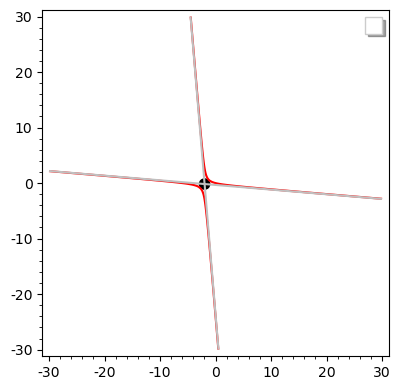

In [8]:
assymptotes_list = []
for hassymptote in hcoefficients:
    assymptotes_list.append((k*x + b).subs(hassymptote)) # Добавляем графики функции ассимптот в список

# Находим точку пересечения двух горизонтальных ассимптот
has_intersection = False
if len(assymptotes_list) >= 2:
    hassymptotes_intersection = solve(assymptotes_list[0] == assymptotes_list[1], x)
    if hassymptotes_intersection:
        hassymptotes_intersection = hassymptotes_intersection[0].right()
        has_intersection = True

# Добавляем в список вертикальную ассимптоту, если она существует
if has_vassymptote:
    assymptotes_list.append(x == vassymptote_equation)

g = Graphics()
g += implicit_plot( # график кривой
    curve, (x, -30, 30), (y, -30, 30), 
    color='red', 
    legend_label="$x^2 + y^2 + 12xy + 6x + 24y = 0$"
) # Легенда не отображается в связи с ошибкой в Sage
# Отрисовка ассимптот
for assymptote in assymptotes_list:
    g += implicit_plot(
        y == assymptote, (x, -30, 30), (y, -30, 30),
        color='#c0c0c0',
        legend_label="$" + str(y == assymptote) + "$"
    ) # Легенда не отображается в связи с ошибкой в Sage
# Отрисовка точки пересечения горизонтальных ассимптот
if has_intersection:
    g += point(
        (hassymptotes_intersection, assymptotes_list[0](hassymptotes_intersection)),
        size=70,
        color='black'
    )
g.legend(True)
g.show()

### Приведение уравнения кривой к каноническому виду 

Рассмотрим уравнение кривой $ x^2 + y^2 + 12xy + 6x + 24y = 0 $ в качестве суммы квадратичной формы и линейного функционала:

Часть уравнения, являющаяся квадратичной формой:
$$ x^2 + y^2 + 12xy $$
Часть уравнения, являющаяся линейным функционалом:
$$ 6x + 24y $$
Введем также вектор $v$:
$$ v = v_e = (x, y)^T $$
Теперь уравнение кривой можно представить в виде
$$ v^T * Q * v + L * v = 0, $$
где Q - матрица квадратичной формы, L - вектор, отвечающий за линейную часть уравнения

**Построение матриц квадратичной формы и линейного функционала:**

In [9]:
curve_Q_lines = [] # строки матрицы квадратичной формы для кривой
for var1 in [x, y]: # проход по всем переменным
    curve_Q_line = [] # новая строка в матрице квадратичной формы
    for var2 in [x, y]:
        element = curve.left().coefficient(var1*var2) # получаем коэффициент перед заданным мономом
        if var1 != var2: # если моном является произведением разных переменных, значение коэффициента перед ним делится на 2
            element = element / 2
        curve_Q_line.append(element) # добавление элемента в строку матрицы
    curve_Q_lines.append(curve_Q_line) # добавление заполненной строки в список строк
curve_Q = matrix(QQ, curve_Q_lines) # составление матрицы квадратичной формы для кривой из полученных строк

curve_L_line = [] # строка вектора линейного функционала для кривой
for var1 in [x, y]: # проход по всем переменным
    element = curve.left().coefficient(var1) # получаем коэффициент перед заданным мономом
    for exclude_var in [x, y]:
        if var1 != exclude_var: # исключение коэффицента перед мономами, содержащими более одной переменной
            element = element.subs([exclude_var == 0])
    curve_L_line.append(element) # добавление коэффициента перед заданным мономом
curve_L = matrix(curve_L_line) # составление матрицы линейного функционала для кривой

print("Q = ")
pretty_print(curve_Q)

print("L = ")
pretty_print(curve_L)

Q = 


[1 6]
[6 1]

L = 


[ 6 24]

**Найдем собственные числа и собственные векторы матрицы Q:**

In [10]:
curve_Q_eigval = curve_Q.eigenvalues() # получаем собственные числа
curve_Q_eigvec = curve_Q.right_eigenvectors() # получаем собственные векторы
curve_Q_eigvec = list(map(
    lambda v: v[1][0].normalized(),
    curve_Q_eigvec
)) # приводим собственные векторы в удобный для работы формат + нормируем

print("Собственные числа матрицы Q:")
pretty_print(curve_Q_eigval)
print("Собственные векторы матрицы Q (нормированные):")
pretty_print(curve_Q_eigvec)

Собственные числа матрицы Q:


[7, -5]

Собственные векторы матрицы Q (нормированные):


[(1/2*sqrt(2), 1/2*sqrt(2)), (1/2*sqrt(2), -1/2*sqrt(2))]

**Проверим равенство норм всех собственных векторов 1 и составим матрицу перехода к базису из собственных векторов:**

In [11]:
print(
    "Равенство норм всех собственных векторов:", 
    bool(curve_Q_eigvec[0].norm() == curve_Q_eigvec[1].norm() == 1)
)

# Матрица ортогонального преобразования
curve_transform_matrix = matrix(curve_Q_eigvec).T
print("Матрица перехода к новому базису:")
pretty_print(curve_transform_matrix)
# Применение ортогонального преобразования к квадратичной форме
curve_Q_transformed = curve_transform_matrix.transpose() * curve_Q * curve_transform_matrix
print("Матрица квадратичной формы кривой в новом базисе:")
pretty_print(curve_Q_transformed)
# Применение ортогонального преобразования к линейному функционалу
curve_L_transformed = curve_L * curve_transform_matrix
print("Матрица линейного функционала кривой в новом базисе:")
pretty_print(curve_L_transformed)

Равенство норм всех собственных векторов: True
Матрица перехода к новому базису:


[ 1/2*sqrt(2)  1/2*sqrt(2)]
[ 1/2*sqrt(2) -1/2*sqrt(2)]

Матрица квадратичной формы кривой в новом базисе:


[ 7  0]
[ 0 -5]

Матрица линейного функционала кривой в новом базисе:


[15*sqrt(2) -9*sqrt(2)]

**Запишем уравнение кривой после преобразований:**

Для этого выполним обратный переход от матриц к уравнению,
воспользуемся формулой $ v^T * Q * v + L * v = 0 $

In [12]:
curve_base_vector = matrix([x, y]).T # вектор (x, y)^T
curve_transformed = curve_base_vector.T * curve_Q_transformed * curve_base_vector + \
    curve_L_transformed * curve_base_vector # уравнение кривой после ортогонального преобразования
curve_transformed = curve_transformed[0][0] == 0
pretty_print(curve_transformed)


7*x^2 - 5*y^2 + 15*sqrt(2)*x - 9*sqrt(2)*y == 0

**Теперь построим график кривой после преобразований:**

No handles with labels found to put in legend.


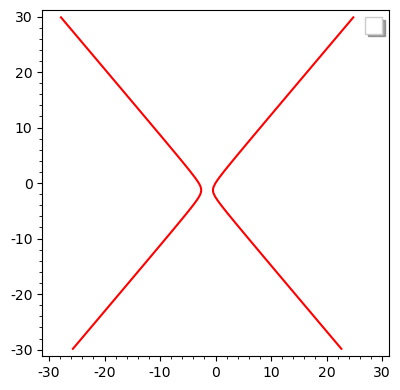

In [13]:
g = Graphics()
g += implicit_plot( # график кривой после преобразований
    curve_transformed, (x, -30, 30), (y, -30, 30), 
    color='red', 
    legend_label="$7x^2 - 5y^2 + 21.2132x - 12.7279y = 0$"
) # Легенда не отображается в связи с ошибкой в Sage
g.legend(True)
g.show()

Добавим на график ассимптоты и найдем точку их пересечения

In [14]:
hassymptote_equation2 = curve_transformed.subs(y == k*x + b).full_simplify().left() # подстановка y = kx+b в функцию кривой после преобразований
hassymptote_coeffs_equations = [] # список уравнений для нахождения коэффициентов ассимптоты 
hassymptote_coeffs_equations.append(
    hassymptote_equation2.coefficient(x, 2) == 0 # приравниваем к нулю коэффициент перед x^2
)
hassymptote_coeffs_equations.append(
    hassymptote_equation2.coefficient(x, 1) == 0 # приравниваем к нулю коэффициент перед x
)
hcoefficients = solve(hassymptote_coeffs_equations, [k, b]) # решаем систему уравнений

vassymptote_equation = curve_transformed.subs(x == a).simplify().left() # подстановка x = a в функцию кривой после преобразований
has_vassymptote = bool(vassymptote_equation.coefficient(y, 2) == 0) # проверка существования вертикальной ассимптоты
vassymptote_coeff = vassymptote_equation.coefficient(y, 1)
if has_vassymptote:
    pretty_print(x == vassymptote_coeff)
else:
    print("Вертикальная ассимптота к графику отсутствует")

assymptotes_list = []
for hassymptote in hcoefficients:
    assymptotes_list.append((k*x + b).subs(hassymptote)) # Добавляем графики функции ассимптот в список
    pretty_print(y == (k*x + b).subs(hassymptote))

# Находим точку пересечения двух горизонтальных ассимптот
has_intersection = False
if len(assymptotes_list) >= 2:
    hassymptotes_intersection = solve(assymptotes_list[0] == assymptotes_list[1], x)
    if hassymptotes_intersection:
        hassymptotes_intersection = hassymptotes_intersection[0].right()
        has_intersection = True

# Добавляем в список вертикальную ассимптоту, если она существует
if has_vassymptote:
    assymptotes_list.append(x == vassymptote_equation)

Вертикальная ассимптота к графику отсутствует


y == -1/5*sqrt(35)*x - 3/14*sqrt(70) - 9/10*sqrt(2)

y == 1/5*sqrt(35)*x + 3/14*sqrt(70) - 9/10*sqrt(2)

No handles with labels found to put in legend.


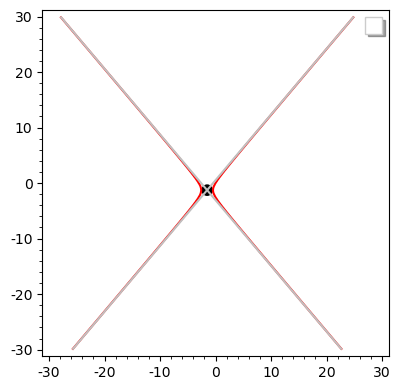

In [15]:
g = Graphics()
g += implicit_plot( # график кривой после преобразований
    curve_transformed, (x, -30, 30), (y, -30, 30), 
    color='red', 
    legend_label="$7x^2 - 5y^2 + 21.2132x - 12.7279y = 0$"
) # Легенда не отображается в связи с ошибкой в Sage
# Отрисовка ассимптот
for assymptote in assymptotes_list:
    g += implicit_plot(
        y == assymptote, (x, -30, 30), (y, -30, 30),
        color='#c0c0c0',
        legend_label="$" + str(y == assymptote) + "$"
    ) # Легенда не отображается в связи с ошибкой в Sage
# Отрисовка точки пересечения горизонтальных ассимптот
if has_intersection:
    g += point(
        (hassymptotes_intersection, assymptotes_list[0](hassymptotes_intersection)),
        size=70,
        color='black'
    )
g.legend(True)
g.show()

Путем параллельного сдвига отцентрируем график

No handles with labels found to put in legend.


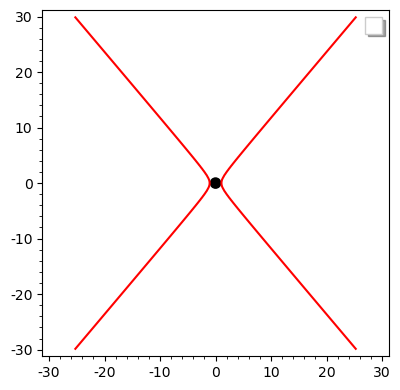

In [16]:
curve_canonical = curve_transformed.subs([
    x == x + hassymptotes_intersection, 
    y == y + assymptotes_list[0](hassymptotes_intersection)
]) # Параллельный сдвиг графика
g = Graphics()
g += point((0, 0), size=70, color="black")
g += implicit_plot( # Отрисовка графика в канонической форме
    curve_canonical, (x, -30, 30), (y, -30, 30),
    color='red',
    legend_label="$" + str(y == curve_canonical) + "$"
) # Легенда не отображается
g.legend(True)
g.show()

### Приведение уравнения поверхности к каноническому виду

Рассмотрим уравнение поверхности $ x^2 + 10y^2 + 10z^2 + 12xy + 12xz + 24yz = 0 $ в качестве квадратичной формы:
Введем вектор $v$:
$$ v = v_e = (x, y, z)^T $$
Теперь уравнение поверхности можно представить в виде
$$ v^T * Q * v = 0, $$
где Q - матрица квадратичной формы

**Построение матрицы квадратичной формы:**

In [17]:
surface_Q_lines = [] # строки матрицы квадратичной формы для поверхности
for var1 in [x, y, z]: # проход по всем переменным
    surface_Q_line = [] # новая строка в матрице квадратичной формы
    for var2 in [x, y, z]:
        element = surface.left().coefficient(var1*var2) # получаем коэффициент перед заданным мономом
        if var1 != var2: # если моном является произведением разных переменных, значение коэффициента перед ним делится на 2
            element = element / 2
        surface_Q_line.append(element) # добавление элемента в строку матрицы
    surface_Q_lines.append(surface_Q_line) # добавление заполненной строки в список строк
surface_Q = matrix(QQ, surface_Q_lines) # составление матрицы квадратичной формы для поверхности из полученных строк

print("Q = ")
pretty_print(surface_Q)

Q = 


[ 1  6  6]
[ 6 10 12]
[ 6 12 10]

**Найдем собственные числа и собственные векторы матрицы Q:**

In [18]:
surface_Q_eigval = surface_Q.eigenvalues() # получаем собственные числа
__surface_Q_eigvec = surface_Q.right_eigenvectors() # получаем собственные векторы
surface_Q_eigvec = []
# приводим собственные векторы в удобный для работы формат + нормируем
for eigen_set in __surface_Q_eigvec:
    for vec in eigen_set[1]:
        surface_Q_eigvec.append(vec.normalized())
    
print("Собственные числа матрицы Q:")
pretty_print(surface_Q_eigval)
print("Собственные векторы матрицы Q (нормированные):")
pretty_print(surface_Q_eigvec)

Собственные числа матрицы Q:


[25, -2, -2]

Собственные векторы матрицы Q (нормированные):


[(1/3, 2/3, 2/3),
 (2/5*sqrt(5), 0, -1/5*sqrt(5)),
 (0, 1/2*sqrt(2), -1/2*sqrt(2))]

**Проверим равенство норм всех собственных векторов 1 и составим матрицу перехода к базису из собственных векторов:**

In [19]:
print(
    "Равенство норм всех собственных векторов:", 
    bool(surface_Q_eigvec[0].norm() == surface_Q_eigvec[1].norm() == surface_Q_eigvec[2].norm() == 1)
)

# Матрица ортогонального преобразования
surface_transform_matrix = matrix(surface_Q_eigvec).T
print("Матрица перехода к новому базису:")
pretty_print(surface_transform_matrix)
# Применение ортогонального преобразования к квадратичной форме
surface_Q_transformed = surface_transform_matrix.inverse() * surface_Q * surface_transform_matrix
print("Матрица квадратичной формы поверхности в новом базисе:")
pretty_print(surface_Q_transformed)

Равенство норм всех собственных векторов: True
Матрица перехода к новому базису:


[         1/3  2/5*sqrt(5)            0]
[         2/3            0  1/2*sqrt(2)]
[         2/3 -1/5*sqrt(5) -1/2*sqrt(2)]

Матрица квадратичной формы поверхности в новом базисе:


[25  0  0]
[ 0 -2  0]
[ 0  0 -2]

**Получим из квадратичной формы уравнение поверхности:**

Для этого выполним обратный переход от матрицы к уравнению,
воспользуемся формулой $ v^T * Q * v = 0 $

In [20]:
surface_base_vector = matrix([x, y, z]).T # вектор (x, y)^T
surface_transformed = surface_base_vector.T * surface_Q_transformed * surface_base_vector # уравнение поверхности после ортогонального преобразования
surface_transformed = surface_transformed[0][0] == 0
pretty_print(surface_transformed)

25*x^2 - 2*y^2 - 2*z^2 == 0

**Наконец, посторим график поверхности в каноническом виде:**

In [21]:
implicit_plot3d(
    surface_transformed,
    (x, -10, 10), (y, -10, 10), (z, -10, 10),
    viewer='threejs',
    adaptive='true'
)

Graphics3d Object